In [23]:
%%capture --no-stderr
%pip install --quiet -U langgraph


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from typing_extensions import TypedDict

class State(TypedDict):
    graphState : str

In [18]:
def node1(state):
    return {"graphState": state["graphState"] + "Caitlyn Jenner is "}

def node2(state):
    return {"graphState": state["graphState"] + "A Man"}

def node3(state):
    return {"graphState": state["graphState"] + "A woman"}



In [19]:
import random
from typing import Literal

def decide(state) -> Literal["node2", "node3"]:
    if random.random() > 0.5:
        return "node2"
    return "node3"

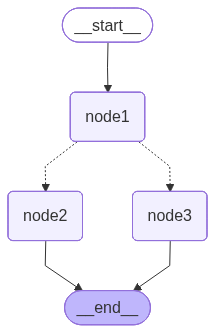

In [20]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
builder = StateGraph(State)

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [1]:
graph.invoke({"graphState": "Hi there! "})

NameError: name 'graph' is not defined